In [1]:
from keras import layers
from keras import models


Using TensorFlow backend.


In [2]:
model = models.Sequential()
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
x_val = train_images[:1000]
y_val = train_labels[:1000]

train_images = train_images[1000:]
train_labels = train_labels[1000:]

In [5]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 51s 872us/step - loss: 0.2469 - acc: 0.9240 - val_loss: 0.1311 - val_acc: 0.9690
Epoch 2/5
59000/59000 [==============================] - 52s 889us/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.0670 - val_acc: 0.9830
Epoch 3/5
59000/59000 [==============================] - 50s 840us/step - loss: 0.0393 - acc: 0.9874 - val_loss: 0.0437 - val_acc: 0.9880
Epoch 4/5
59000/59000 [==============================] - 53s 900us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0533 - val_acc: 0.9860
Epoch 5/5
59000/59000 [==============================] - 55s 931us/step - loss: 0.0235 - acc: 0.9929 - val_loss: 0.0566 - val_acc: 0.9900


In [6]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

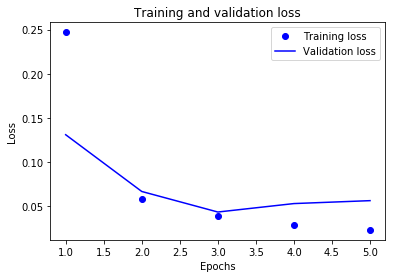

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

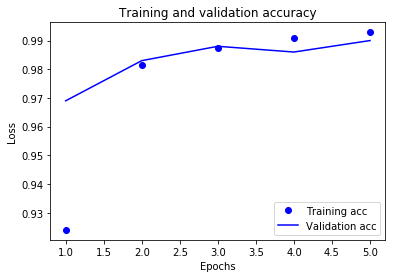

In [8]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
results = model.evaluate(test_images, test_labels)
print(results)

10000/10000 [==============================] - 4s 399us/step
[0.033015176048794094, 0.9917]
